In [15]:
import h5py

#ddf = dd.read_hdf('/home/viklund/Projects/3deds/TE1NR005_3D_EDS/h5oina/Slice & View 09-29 Specimen 1 Slice 1 EDS - SliceImage - 001 13.h5oina', key='/*')
#ddf

f = h5py.File('data/NR005_EBSD_TEST9 Specimen 1 Slice 1 EBSD - SliceImage - 001 2.h5oina', 'r')



In [23]:
import numpy as np

print(list(f['1/EDS/Data/Window Integral'].keys()))
np.array(f['1/EBSD/Data/Phase'])

['Nb Lα1', 'Sn Lα1']


array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [19]:
import numpy as np
import os
import h5py

def append_to_stack(z_index, stack_list, h5_data, h5_path):
    data = np.array(f[h5_path],dtype = 'uint32').reshape(image_resolution[1],image_resolution[0]).T
    stack_list[:,:,z_index] = data
    return stack_list


directory = "./data/"
data_folder = directory
output_folder =  './'


h5_files = os.listdir(data_folder)
sorted_files = sorted(h5_files, key=lambda x: int(x.split(' ')[9]))

f = h5py.File(data_folder+sorted_files[0], 'r')
pixel_size = (0.040,0.040,0.040)
image_resolution = (f['1/EDS/Header/X Cells'][0],f['1/EDS/Header/Y Cells'][0],len(sorted_files))
image_z_resolution = len(sorted_files)



Nb_wt = np.zeros((image_resolution[0],image_resolution[1],image_z_resolution))
#Pt_wt = np.zeros((image_resolution[0],image_resolution[1],image_z_resolution))
Sn_wt = np.zeros((image_resolution[0],image_resolution[1],image_z_resolution))
#Al_wt = np.zeros((image_resolution[0],image_resolution[1],image_z_resolution))

Euler = np.zeros((image_resolution[0],image_resolution[1],image_z_resolution))

for i in range(len(sorted_files)):
    file = sorted_files[i]
    f = h5py.File(data_folder+file, 'r')
    
    Nb_wt = append_to_stack(i, Nb_wt, f, '1/EDS/Data/Window Integral/Nb Lα1')
    #Pt_wt = append_to_stack(i, Pt_wt, f, '1/EDS/Data/Composition/Pt Wt%')
    Sn_wt = append_to_stack(i, Sn_wt, f, '1/EDS/Data/Window Integral/Sn Lα1')
    #Al_wt = append_to_stack(i, Al_wt, f, '1/EDS/Data/Composition/Al Wt%')

    Euler = append_to_stack(i, Euler, f, '1/EBSD/Data/Euler')



ValueError: cannot reshape array of size 11570 into shape (89,130,3)

In [ ]:
raw_data = (np.copy(Nb_wt),np.copy(Sn_wt),np.copy(Euler))

In [ ]:
from scipy.ndimage import gaussian_filter
from skimage.measure import block_reduce
import matplotlib.pyplot as plt

def smooth(data, binning, epsilon):
    data = gaussian_filter(data, epsilon)
    data = block_reduce(data, block_size=binning, func=np.mean)
    return data
    
def crop(data, x, y, z):
    data = data[x:-x-1,y:-y-1,z:-z-1]
    return data

Nb_wt = raw_data[0]
#Pt_wt = raw_data[1]
Sn_wt = raw_data[1]
#Al_wt = raw_data[3]

Euler = raw_data[2]

binning_number = 1
cropping = 0

pixel_size = (binning_number*0.040,
              binning_number*0.040,
              binning_number*0.040)
image_resolution = (f['1/EDS/Header/X Cells'][0]/binning_number-2*cropping,
                    f['1/EDS/Header/Y Cells'][0]/binning_number-2*cropping,
                    len(sorted_files)/binning_number-2*cropping)

Nb_wt = smooth(Nb_wt, binning_number, 1.0)
Nb_wt = crop(Nb_wt, cropping, cropping, cropping)

Sn_wt = smooth(Sn_wt, binning_number, 1.0)
Sn_wt = crop(Sn_wt, cropping, cropping, cropping)

#Pt_wt = smooth(Pt_wt, binning_number, 1.0)
#Pt_wt = crop(Pt_wt, cropping, cropping, cropping)

#Al_wt = smooth(Al_wt, binning_number, 1.0)
#Al_wt = crop(Al_wt, cropping, cropping, cropping)
    
#%%





In [ ]:
#total_at = Sn_wt/118.71+Nb_wt/92.906+Pt_wt/195.08+Al_wt/26.982
#Sn_at = 100*(Sn_wt/118.71)/total_at
#Nb_at = 100*(Nb_wt/92.906)/total_at
#Pt_at = 100*(Pt_wt/195.08)/total_at
#Al_at = 100*(Al_wt/26.982)/total_at

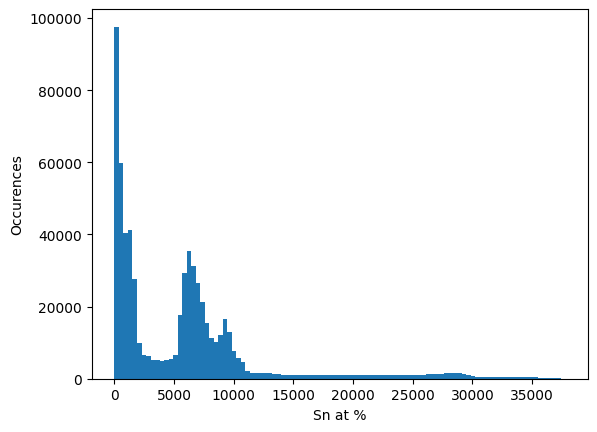

In [ ]:
fig = plt.figure()
plt.hist(Sn_wt.flatten(),bins=100)
plt.xlabel('Sn at %')
plt.ylabel('Occurences')
plt.show()
fig.savefig('figs/Sn_histogram')

NameError: name 'Euler' is not defined

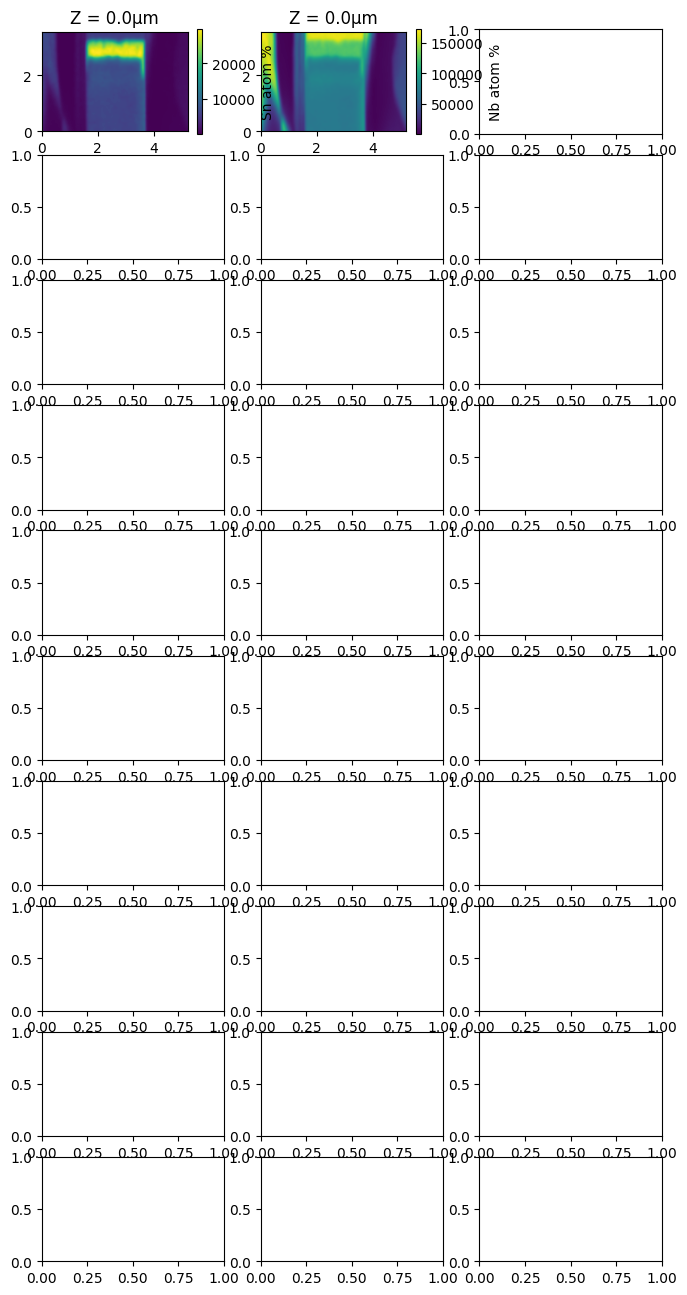

In [ ]:
slices = np.linspace(1, image_resolution[2]-1,num=10)

bounds = [0,image_resolution[0]*pixel_size[0],
          0,image_resolution[1]*pixel_size[1],
          0,image_resolution[2]*pixel_size[2],]



fig, axs = plt.subplots(10,3,figsize=(8,16))

for i, z_slice in enumerate(slices):
    z_index = int(z_slice)-1


    im = axs[i,0].imshow(Sn_wt[:,:,z_index].T,extent=bounds[0:4])
    axs[i,0].set_title('Z = '+str(round(z_index*pixel_size[2],2))+'μm')
    cbar = fig.colorbar(im, ax=axs[i,0])
    cbar.ax.set_ylabel('Sn atom %')

    im = axs[i,1].imshow(Nb_wt[:,:,z_index].T,extent=bounds[0:4])
    axs[i,1].set_title('Z = '+str(round(z_index*pixel_size[2],2))+'μm')
    cbar = fig.colorbar(im, ax=axs[i,1])
    cbar.ax.set_ylabel('Nb atom %')

    im = axs[i,2].imshow(Euler[:,:,z_index].T,extent=bounds[0:4])
    axs[i,2].set_title('Z = '+str(round(z_index*pixel_size[2],2))+'μm')
    cbar = fig.colorbar(im, ax=axs[i,2])
    cbar.ax.set_ylabel('Al atom %')


#fig.savefig('figs/slices.png')


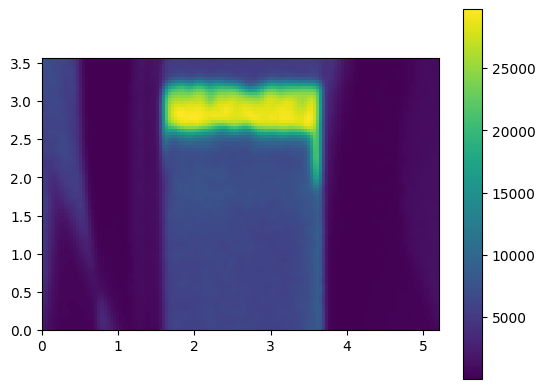

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation
import matplotlib.colors as colors

fig, axs = plt.subplots(1)

#TMAP = np.clip(TMAP,1e-6,None)

map1 = axs.imshow(Sn_wt[:,:,0].T,extent=bounds[0:4])
c = fig.colorbar(map1, ax=axs)


def update(frame):

    map1.set_array(Sn_wt[:,:,frame].T)


    return (map1)


ani = animation.FuncAnimation(fig=fig, func=update, frames=Sn_wt.shape[-1], interval=30)

ani.save('test.mp4', writer = 'ffmpeg', fps = 2) 